In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [136]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Univariate Analysis

In [137]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


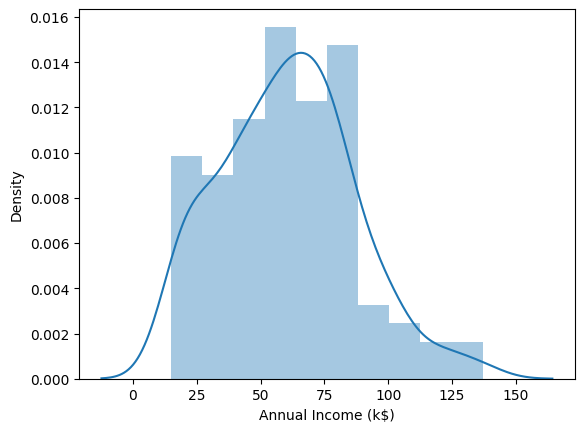

In [138]:
sns.distplot(df['Annual Income (k$)']);

In [139]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

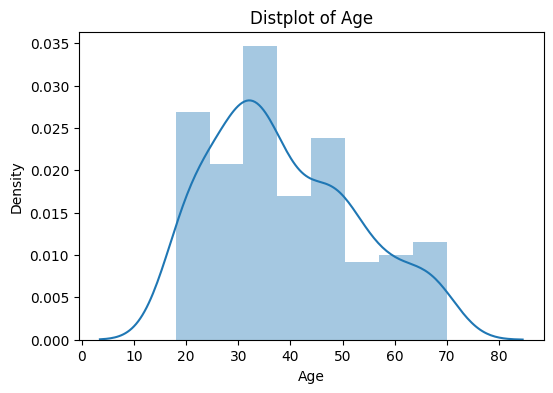

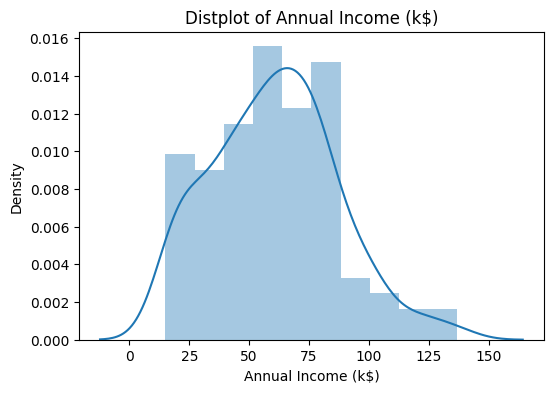

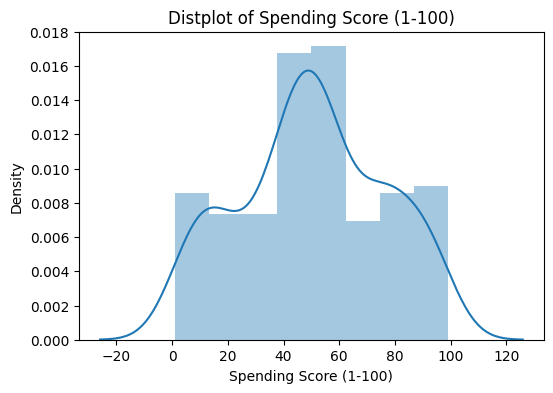

In [140]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure(figsize=(6,4))
    sns.distplot(df[i])
    plt.title(f'Distplot of {i}')
    plt.show()

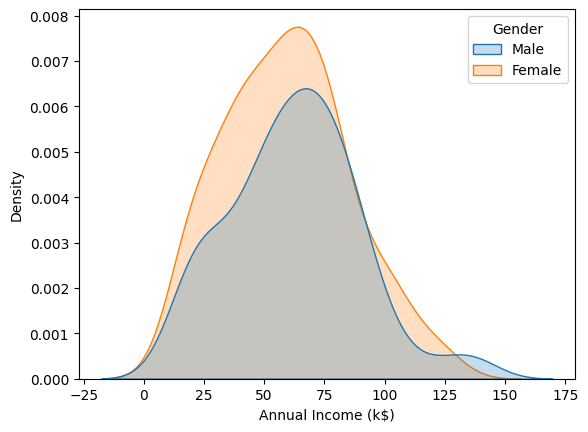

In [141]:
sns.kdeplot(data=df, x='Annual Income (k$)', hue='Gender', fill=True)
plt.show()

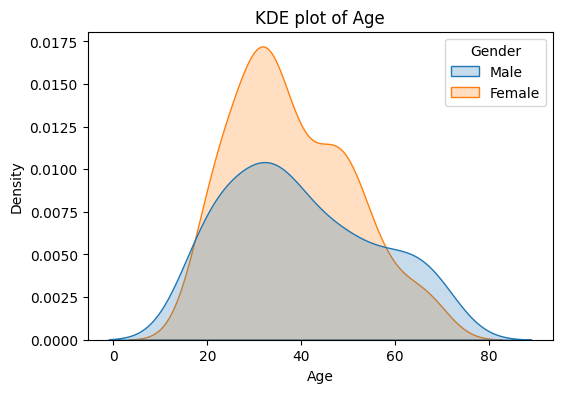

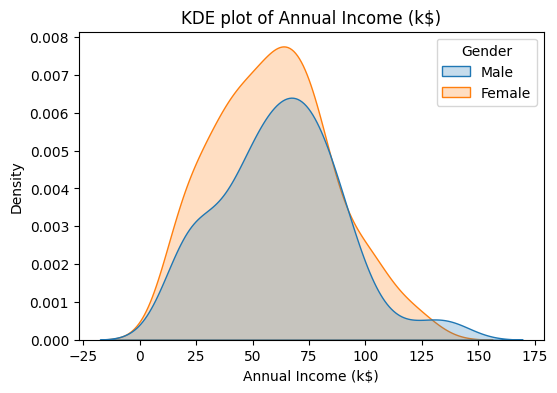

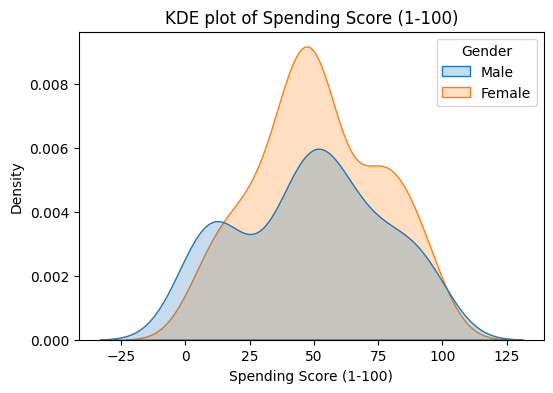

In [142]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=i, hue='Gender', fill= True)
    plt.title(f'KDE plot of {i}')
    plt.show()

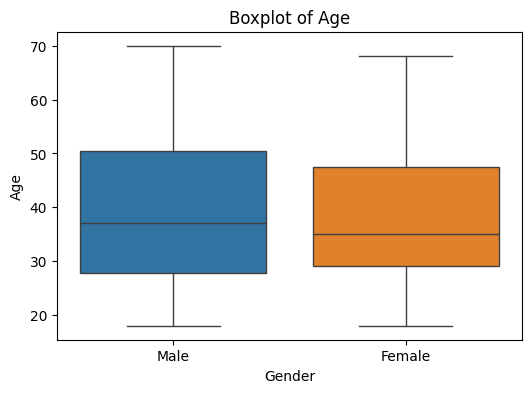

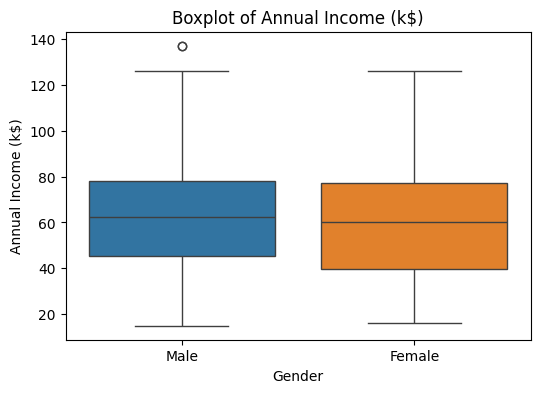

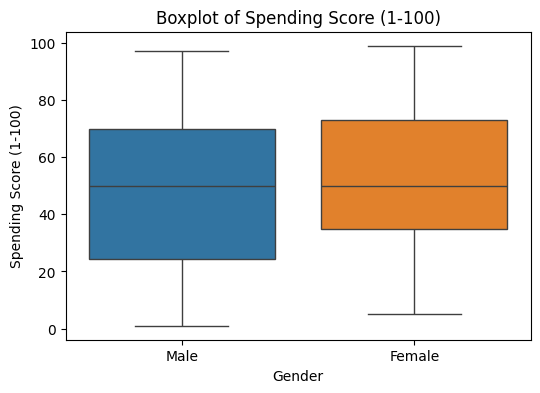

In [143]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data =df, x='Gender',y=i, hue='Gender')
    plt.title(f'Boxplot of {i}')
    plt.show()

In [144]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

### Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

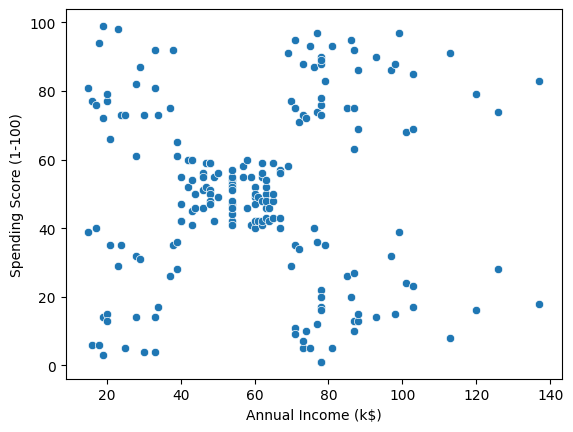

In [145]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

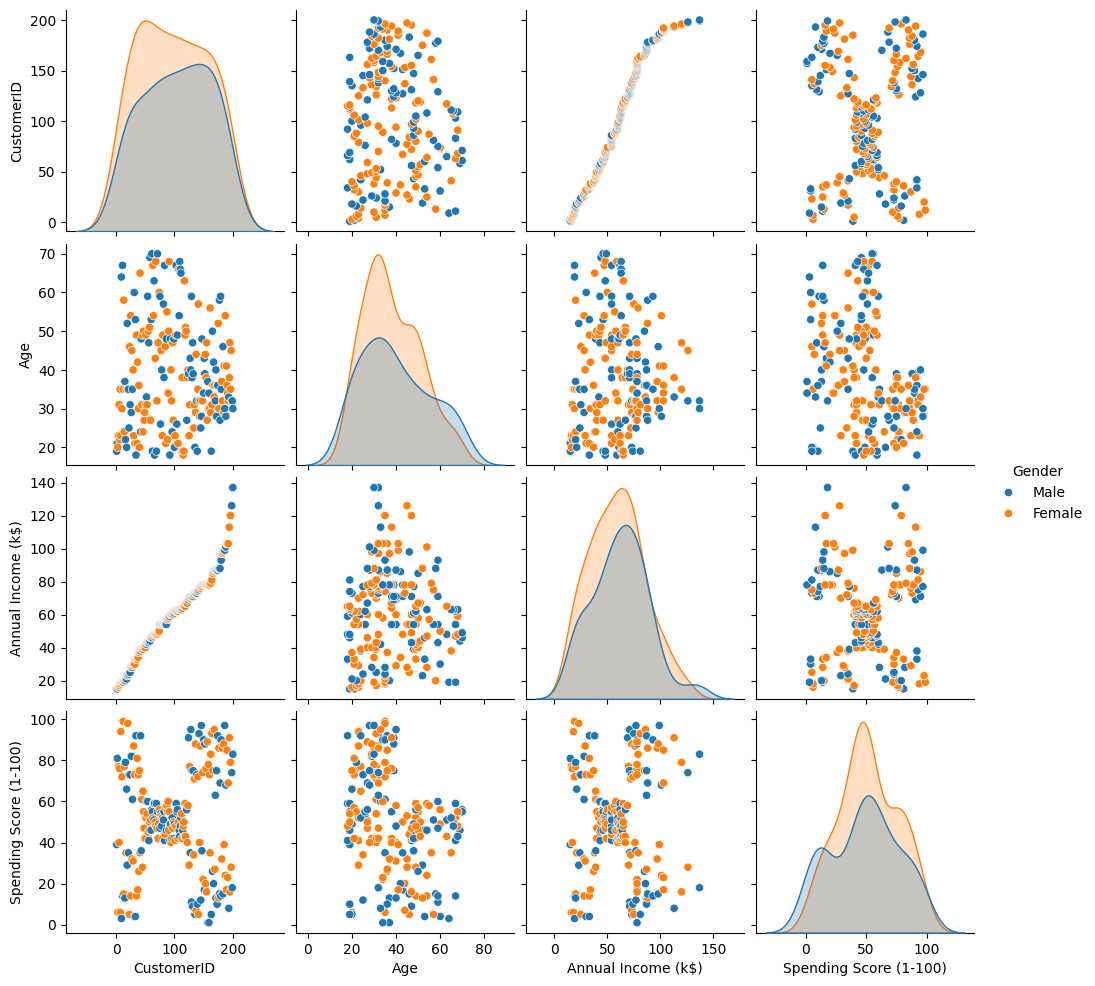

In [146]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [147]:
columns= ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df.groupby(['Gender'])[columns].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [148]:
df.corr(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

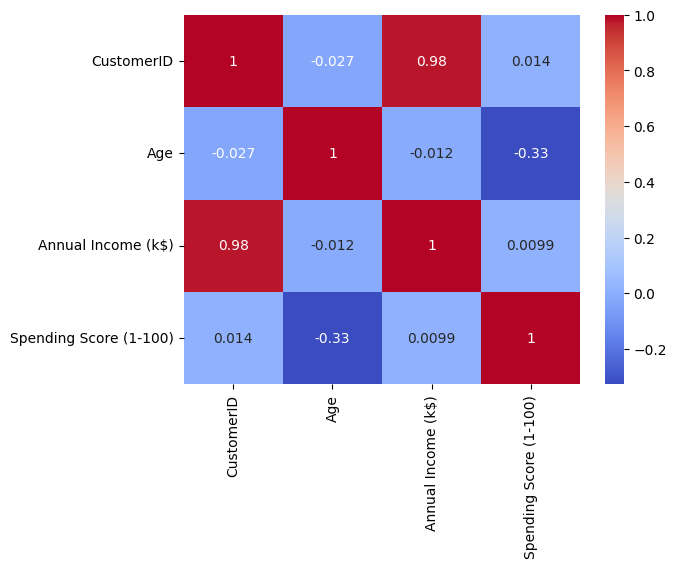

In [149]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

### Clustering - Univariate, Bivariate, Multivariate

In [150]:
cluster1 = KMeans(n_clusters=3, random_state=42)

In [151]:
cluster1.fit(df[['Annual Income (k$)']])

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [152]:
cluster1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [153]:
df['Income Cluster'] = cluster1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [154]:
df['Income Cluster'].value_counts()

Income Cluster
0    86
2    58
1    56
Name: count, dtype: int64

In [155]:
cluster1.inertia_

25640.45778439684

In [156]:
inertia_score=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_score.append(kmeans.inertia_)

In [157]:
inertia_score

[137277.28000000006,
 48968.020808323345,
 25640.45778439684,
 13278.112713472483,
 10162.549579831924,
 5103.823725981623,
 4284.4549822158515,
 3163.2800653594777,
 2190.0972210795735,
 1833.5085081585087]

Text(0, 0.5, 'Inertia Score')

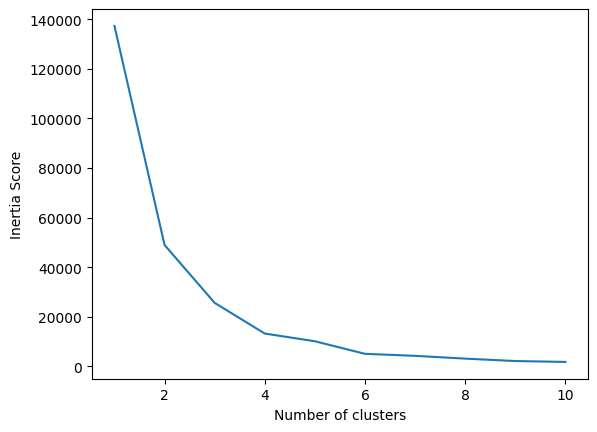

In [158]:
plt.plot(range(1,11), inertia_score)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score') 

In [159]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [160]:
df.groupby('Income Cluster')[['Annual Income (k$)','Spending Score (1-100)']].mean()

,Annual Income (k$),Spending Score (1-100)
Income Cluster,,
0,60.906977,50.337209
1,92.142857,50.517857
2,29.551724,49.689655


In [161]:
#Bivariate clustering

cluster2 = KMeans(n_clusters=5)
cluster2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =cluster2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,4
1,2,Male,21,15,81,2,3
2,3,Female,20,16,6,2,4
3,4,Female,23,16,77,2,3
4,5,Female,31,17,40,2,4


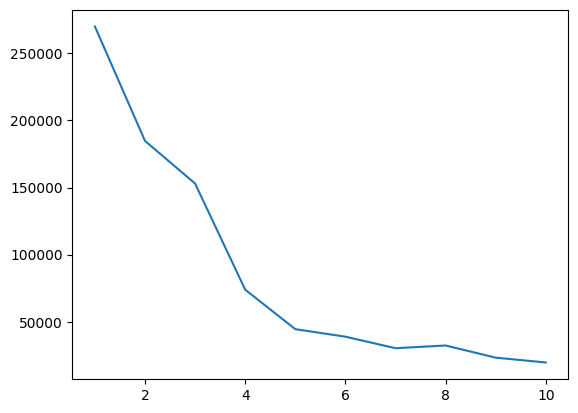

In [162]:
inertia_score2 = []
for i in range (1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_score2.append(kmeans2.inertia_)
plt.plot(range(1,11), inertia_score2)

In [163]:
centers = pd.DataFrame(cluster2.cluster_centers_)
centers.columns = ['x','y']

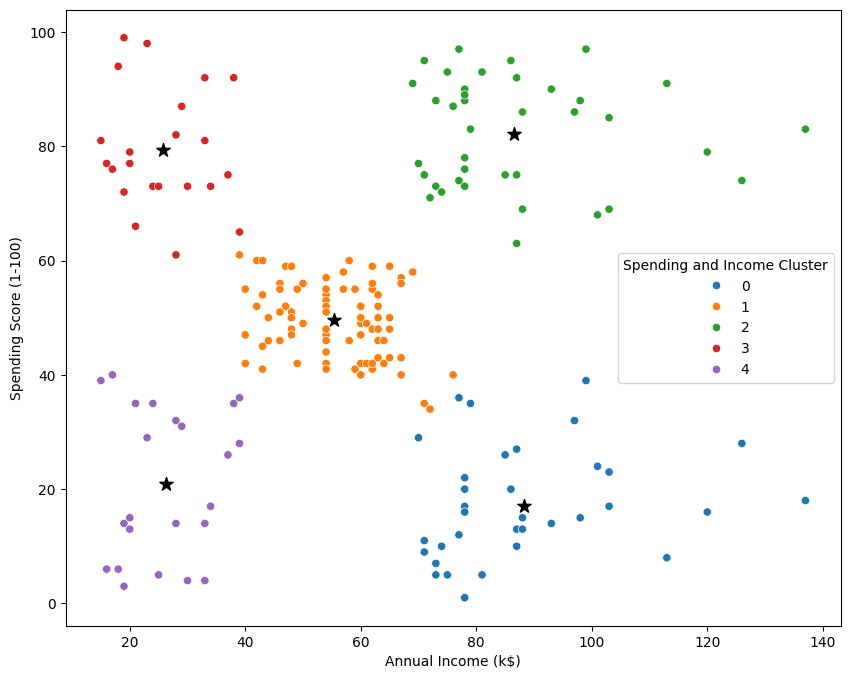

In [164]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [165]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.457143,0.542857
1,0.592593,0.407407
2,0.538462,0.461538
3,0.590909,0.409091
4,0.608696,0.391304


In [166]:
df.groupby('Spending and Income Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,41.114286,88.200000,17.114286
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


In [167]:
# Multivariate clustering

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [168]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,4
1,2,Male,21,15,81,2,3
2,3,Female,20,16,6,2,4
3,4,Female,23,16,77,2,3
4,5,Female,31,17,40,2,4


In [169]:
dff = pd.get_dummies(df, drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,2,4,True
1,2,21,15,81,2,3,True
2,3,20,16,6,2,4,False
3,4,23,16,77,2,3,False
4,5,31,17,40,2,4,False


In [170]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [171]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [172]:
dff = scale.fit_transform(dff)

In [173]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


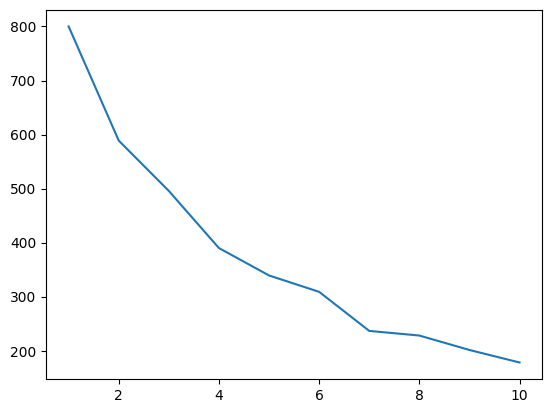

In [174]:
inertia_score3 = []
for i in range(1,11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_score3.append(kmeans3.inertia_)
plt.plot(range(1,11), inertia_score3)

In [175]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,4
1,2,Male,21,15,81,2,3
2,3,Female,20,16,6,2,4
3,4,Female,23,16,77,2,3
4,5,Female,31,17,40,2,4
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,2
196,197,Female,45,126,28,1,0
197,198,Male,32,126,74,1,2
198,199,Male,32,137,18,1,0
